In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [17]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
#data = pd.read_sql("SELECT * FROM station",conn)
#data = engine.execute("SELECT * FROM station")
#for record in data:
#   print(record)

In [30]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)
 

In [31]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [134]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [40]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])
    
columns2 = inspector.get_columns('station')
for column in columns2:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [70]:
# Find the most recent date in the data set.
from datetime import datetime

recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first() 
recent_date = datetime.strptime(recent_date[0],"%Y-%m-%d")


2017-08-23 00:00:00


In [137]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date = dt.date(recent_date.year - 1, recent_date.month, recent_date.day)


# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, measurement.prcp]
last_year_prcp = session.query(*sel).\
    filter(measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(last_year_prcp, columns=['date', 'prcp'])
df.set_index('date')


# Sort the dataframe by date
df = df.sort_index()


list

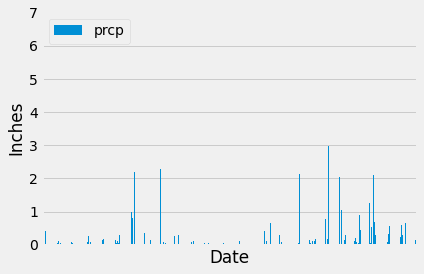

In [102]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.dates as mdates

df.plot.bar()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks([])
plt.show()


In [103]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [135]:
# Design a query to calculate the total number stations in the dataset
sel = [station.id]
all_stations = session.query(*sel).all()
print(len(all_stations))

9
[(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)]


In [110]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [143]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_id = 'USC00519281'
sel = [func.avg(measurement.tobs),func.min(measurement.tobs),func.max(measurement.tobs)] 
results = session.query(*sel).\
    filter(measurement.station == active_id).all()
print(results)

[(71.66378066378067, 54.0, 85.0)]


Text(0, 0.5, 'Frequency')

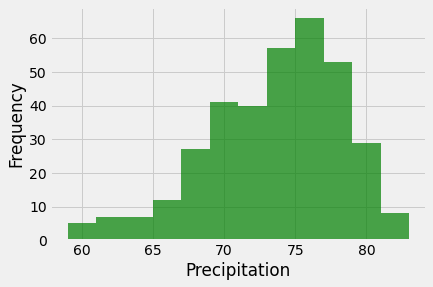

In [130]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_data = session.query(measurement.tobs).\
filter((measurement.date >= start_date)&(measurement.station == active_id)).all()

df = pd.DataFrame(active_data,columns=["Prcp"])
bins = 12
plt.hist(df["Prcp"], bins, color ='green', alpha = 0.7)
plt.xlabel("Precipitation")
plt.ylabel("Frequency")

# Close session

In [129]:
# Close Session
session.close()